In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras import callbacks
from sklearn.compose import make_column_transformer, make_column_selector
from matplotlib import pyplot as plt

In [3]:
spotify = pd.read_csv(r'C:\Projects\DataSci\SampleData\Kaggle\dl-course\spotify.csv')

In [ ]:
X = spotify.copy()  
preprocessor.fit(X_train)


X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
input_shape = [X_train.shape[1]]

y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_test = y_test / 100


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2423 - val_loss: 0.2030
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2006 - val_loss: 0.1991
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1938 - val_loss: 0.1977
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1913 - val_loss: 0.1964
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1901 - val_loss: 0.1955
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1878 - val_loss: 0.1965
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1873 - val_loss: 0.1957
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1864 - val_loss: 0.1947
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1863 - val_loss: 0.1950
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1854 - val_loss: 0.1943
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1832 - val_loss: 0.1940
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1838 - val_lo

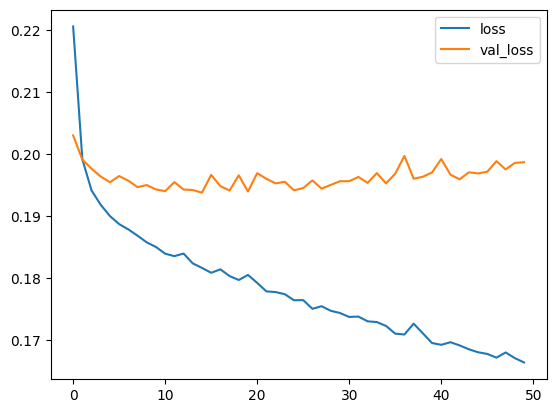

In [9]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [10]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)


Epoch 1/50


c:\Projects\DataSci\.mlws\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3142 - val_loss: 0.2078
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2047 - val_loss: 0.2014
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1983 - val_loss: 0.1996
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1945 - val_loss: 0.1975
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1932 - val_loss: 0.1962
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1911 - val_loss: 0.1956
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1899 - val_loss: 0.1962
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1883 - val_loss: 0.1955
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1888 - val_loss: 0.1947
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1856 - val_loss: 0.1945
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1839 - val_loss: 0.1942
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1871 - val_loss: 0.1944


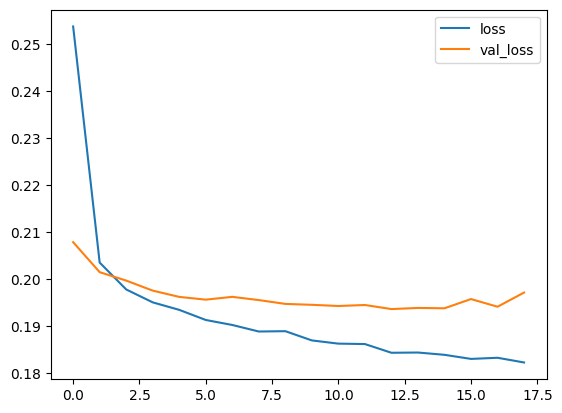

In [11]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));